In [2]:
import defs
import pandas as pd
import numpy as np

In [3]:
df = pd.read_pickle('data/EUR_USD_M5.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'data/EUR_USD_M5.pkl'

Gross performance:
returns     0.985947
strategy    1.007798
dtype: float64


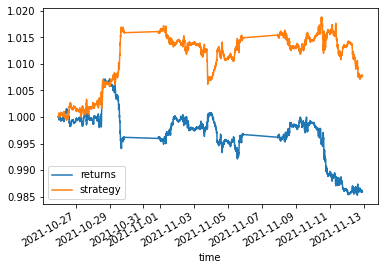

In [66]:
df[['returns', 'strategy']].cumsum().apply(np.exp).plot()
print(f"Gross performance:\n{df[['returns', 'strategy']].sum().apply(np.exp)}")

In [62]:
df[['strategy', 'returns']].sum().apply(np.exp)[0].round(6)

1.007798

In [85]:
instruments = ['EUR_USD', 'EUR_AUD', 'EUR_NZD', 'EUR_CAD', 'GBP_AUD']
tfs = ['M1', 'M5', 'M15', 'M30', 'H1']

results = []
for inst in instruments:
    print(inst, end='')
    for tf in tfs:        
        print(f' {tf}', end='')
        filename = f'data/{inst}_{tf}.pkl'
        df = pd.read_pickle(filename)
        # instrument hozama 
        df['returns'] = np.log(df.mid_c/df.mid_c.shift(1))
        df['mom'] = df.mid_c.diff(10)
        for ql in range (1, 49):
            for qh in range(1,49):
                q_low = df.mom.quantile(ql/100)
                q_hi = df.mom.quantile((100-qh)/100)
                df['position'] = np.where(df.mom>q_low, 1, 0)
                df['position'] = np.where(df.mom<q_hi,-1, df.position)
                df['strategy'] = df.position.shift(1) * df.returns 
                df[['strategy', 'returns']].sum().apply(np.exp)[0].round(6)
                result = dict(
                    inst = inst,
                    tf = tf,
                    ql = ql,
                    qh = qh,
                    q1 = q_low,
                    q2 =  q_hi,
                    strategy =  df[['strategy', 'returns']].sum().apply(np.exp)[0].round(6),
                    returns = df[['strategy', 'returns']].sum().apply(np.exp)[1].round(6)
                )
                results.append(result)
    print('')
df_results = pd.DataFrame(results)
df_results.shape

EUR_USD M1 M5 M15 M30 H1
EUR_AUD M1 M5 M15 M30 H1
EUR_NZD M1 M5 M15 M30 H1
EUR_CAD M1 M5 M15 M30 H1
GBP_AUD M1 M5 M15 M30 H1


(57600, 8)

In [117]:
df_results[(df_results.strategy > 1) & (df_results.ql==8)& (df_results.qh==8)]

,inst,tf,ql,qh,q1,q2,strategy,returns
343,EUR_USD,M1,8,8,-0.000500,0.000420,1.011225,0.987453
2647,EUR_USD,M5,8,8,-0.000980,0.000880,1.009447,0.985947
4951,EUR_USD,M15,8,8,-0.001569,0.001280,1.025218,0.968917
7255,EUR_USD,M30,8,8,-0.002000,0.001850,1.003920,0.973161
9559,EUR_USD,H1,8,8,-0.003198,0.003150,1.035717,0.968114
11863,EUR_AUD,M1,8,8,-0.000770,0.000660,1.002812,0.992233
16471,EUR_AUD,M15,8,8,-0.003180,0.002940,1.037917,0.968219
18775,EUR_AUD,M30,8,8,-0.004079,0.003860,1.022514,0.969759
27991,EUR_NZD,M15,8,8,-0.003330,0.003000,1.009122,0.978611
30295,EUR_NZD,M30,8,8,-0.004559,0.003800,1.048154,0.951401


In [ ]:

df_results.plot.scatter(x = 'i', y = 'res');

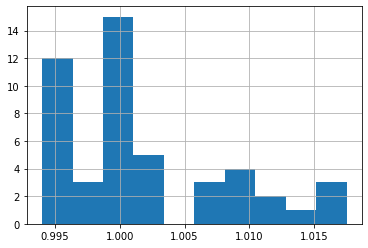

In [79]:
df_results.res.hist();